# Telco Churn Prediction

## İş Problemi

Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi beklenmektedir.


## Veri Seti Hikayesi

Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir.
Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu gösterir.

## DEĞİŞKENLER

**CustomerId:** Müşteri İd’si
**Gender:** Cinsiyet
**SeniorCitizen:** Müşterinin yaşlı olup olmadığı (1, 0)
**Partner:** Müşterinin bir ortağı olup olmadığı (Evet, Hayır)
**Dependents:** Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
**tenure:** Müşterinin şirkette kaldığı ay sayısı
**PhoneService:** Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
**MultipleLines:** Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
**InternetService:** Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
**OnlineSecurity:** Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
**OnlineBackup:** Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
**DeviceProtection:** Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
**TechSupport:** Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
**StreamingTV:** Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
**StreamingMovies:** Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
**Contract:** Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
**PaperlessBilling:** Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
**PaymentMethod:** Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
**MonthlyCharges:** Müşteriden aylık olarak tahsil edilen tutar
**TotalCharges:** Müşteriden tahsil edilen toplam tutar
**Churn:** Müşterinin kullanıp kullanmadığı (Evet veya Hayır)


### Görev 1 : Keşifçi Veri Analizi

In [1]:
# Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action="ignore")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)


In [5]:
# Veri setinin import edilmesi
df_ = pd.read_csv("/Users/melihgunaydin/Desktop/Miuul DSML16/6- Machine Learning/Case Study 3/TelcoChurn/Telco-Customer-Churn.csv")
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Adım 1: Numerik ve kategorik değişkenleri yakalayınız.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [9]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [10]:
cat_but_car = [col for col in cat_but_car if col not in "customerID"]

In [11]:
# Adım 2: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)
df[cat_but_car] = df[cat_but_car].apply(pd.to_numeric, errors='coerce')
df[num_but_cat] = df[num_but_cat].replace({1: "yes", 0: "no"}).astype("object")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Adım 3: Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.

# Numerik Değişkenler
df.describe().T


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################


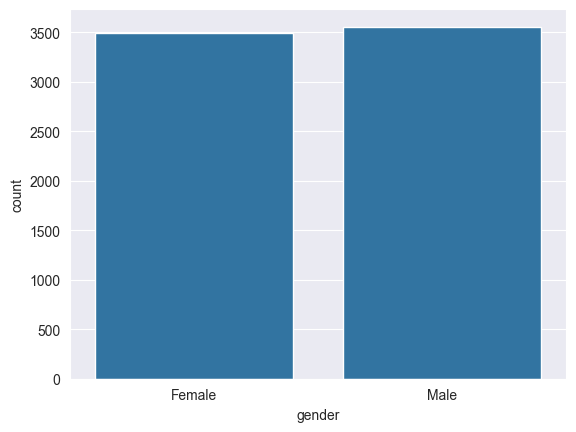

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################


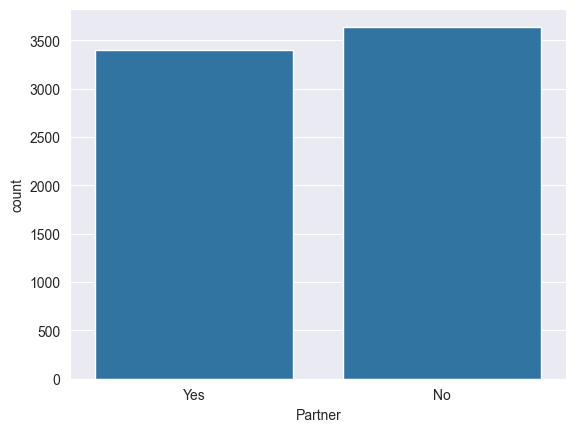

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################


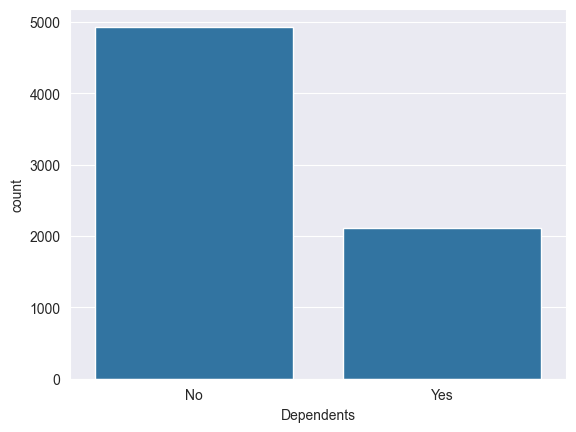

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################


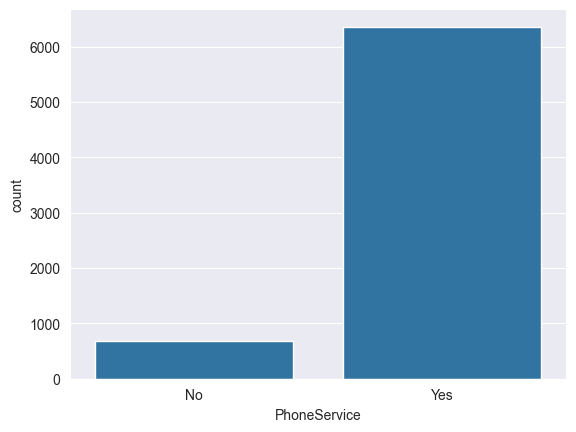

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################


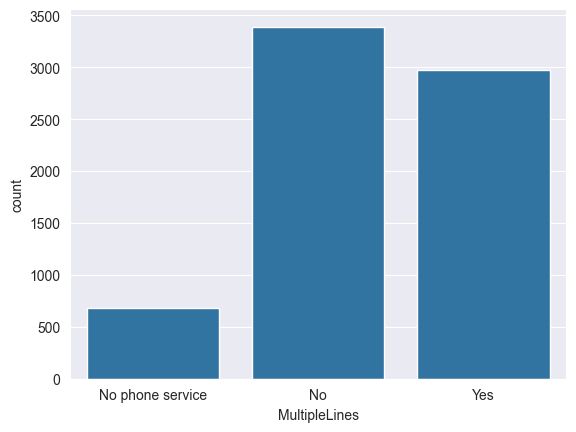

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
##########################################


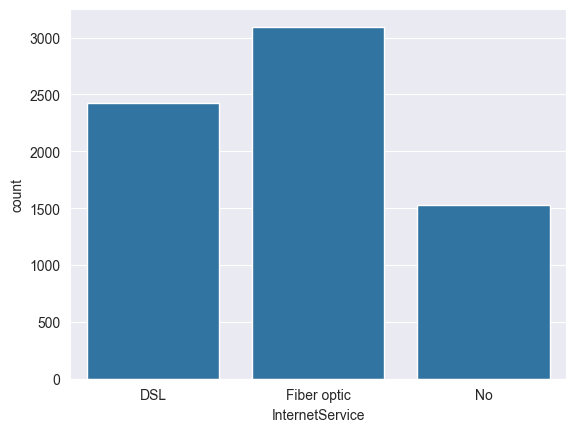

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
##########################################


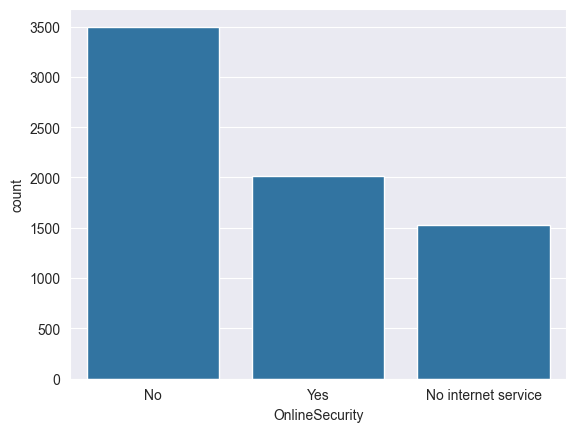

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
##########################################


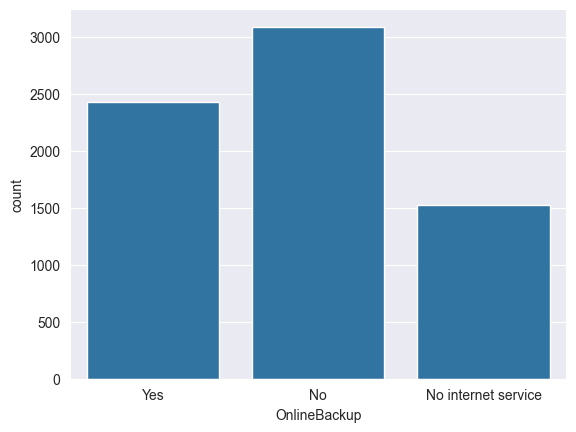

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
##########################################


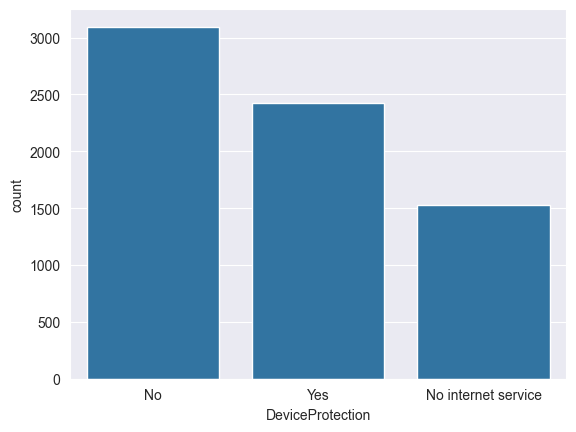

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
##########################################


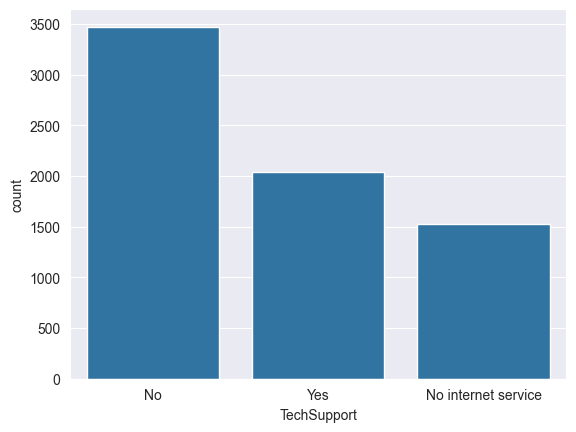

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
##########################################


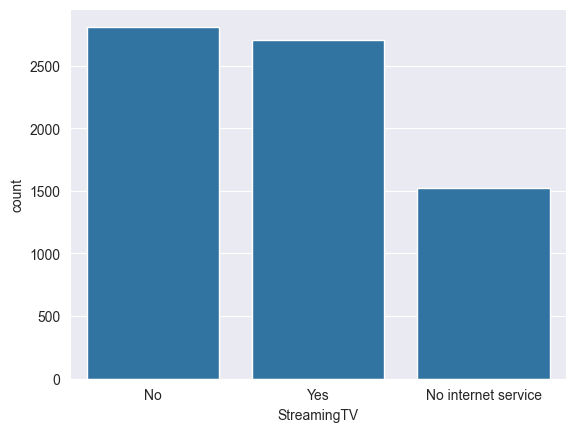

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
##########################################


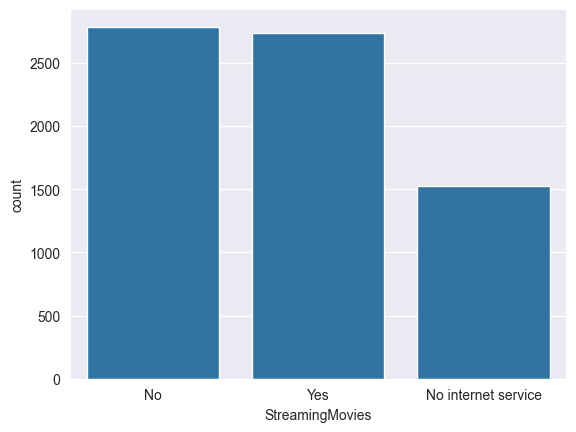

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


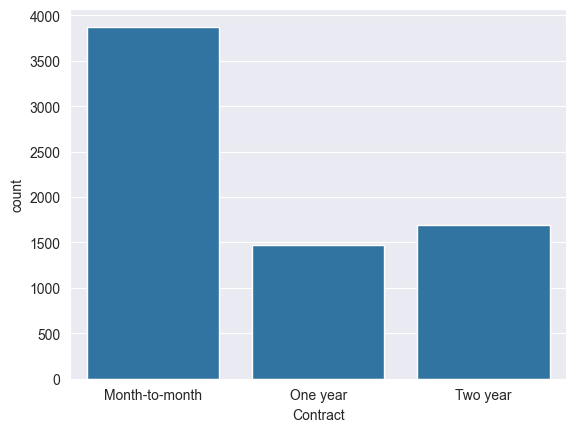

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078
##########################################


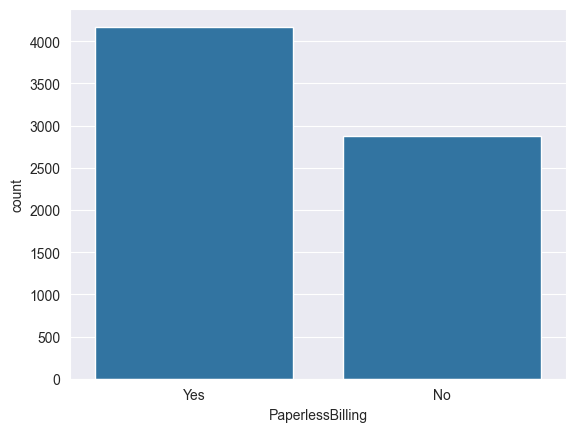

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


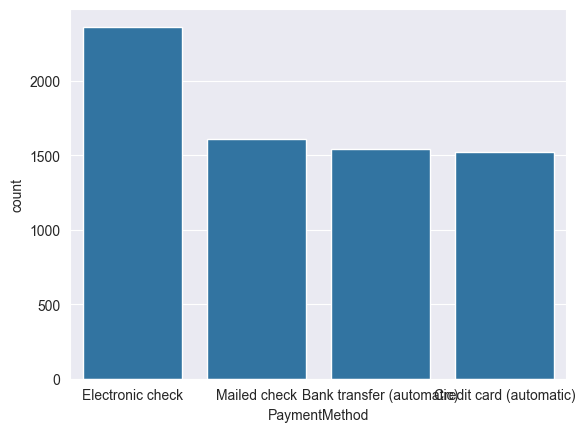

     Churn      Ratio
No    5174  73.463013
Yes   1869  26.536987
##########################################


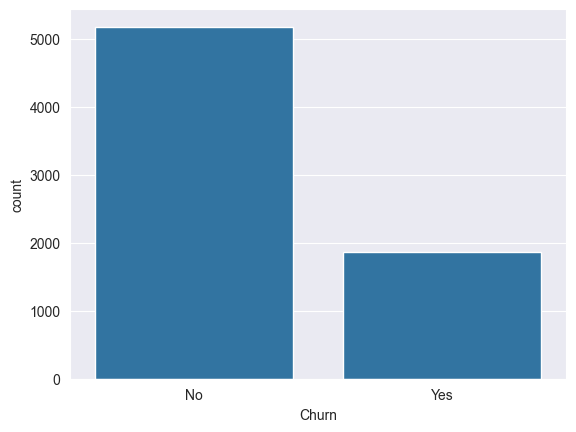

     SeniorCitizen      Ratio
no            5901  83.785319
yes           1142  16.214681
##########################################


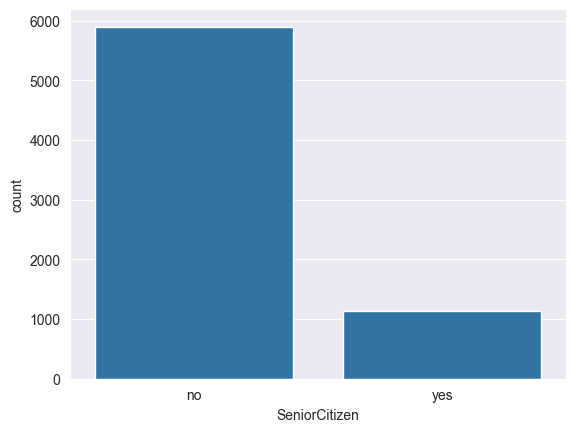

In [14]:
# Kategorik Değişkenler
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col, True)


In [15]:
# Adım 4: Kategorik değişkenler ile hedef değişken incelemesini yapınız.
def target_summary_with_cat(dataframe, target, categorical_col):
    # Sayıları hesapla
    count_summary = dataframe.groupby(target).agg({categorical_col: "count"})

    # Yüzdeleri hesapla
    percentage_summary = dataframe.groupby(target).agg({categorical_col: lambda x: (x.count() / len(dataframe)) * 100})

    # Sonuçları birleştir
    summary = pd.concat([count_summary, percentage_summary.rename(columns={categorical_col: 'percentage'})], axis=1)
    summary.columns = ['count', 'percentage']

    print(summary, end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


       count  percentage
Churn                   
No      5174   73.463013
Yes    

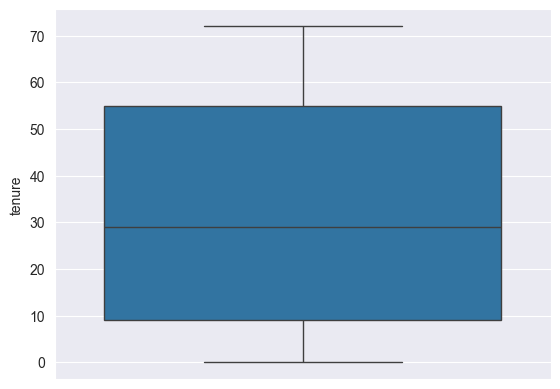

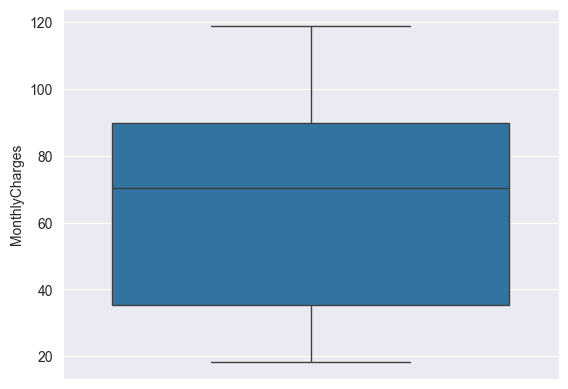

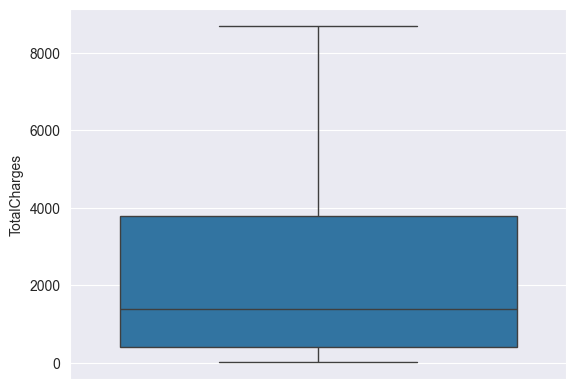

In [16]:
# Adım 5: Aykırı gözlem var mı inceleyiniz.

for col in df.select_dtypes(exclude="object").columns:
    sns.boxplot(df[col])
    plt.show()

In [17]:
# Adım 6: Eksik gözlem var mı inceleyiniz.

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


['TotalCharges']

In [18]:
na_cols = missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11   0.16


### Görev 2: Feature Engineering

In [20]:
# Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

df[df["TotalCharges"].isna() == True] # 11 gözlem

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,no,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,no,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,no,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,no,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,no,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,no,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,no,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,no,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,no,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,no,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
df.groupby(["SeniorCitizen", "Dependents", "Contract", "Churn","gender"]).agg("TotalCharges").mean()["no", "Yes", slice(None), "No","Male"]

Contract
Month-to-month    1417.035685
One year          2448.786486
Two year          3440.664516
Name: TotalCharges, dtype: float64

In [22]:
df.groupby(["SeniorCitizen", "Dependents", "Contract", "Churn","gender"]).agg("TotalCharges").mean()["no", "Yes", slice(None), "No","Female"]

# two year no female => 3202.545745
# two year no male => 3440.664516
# one year => 2448.786486

Contract
Month-to-month    1460.149801
One year          2744.840657
Two year          3202.545745
Name: TotalCharges, dtype: float64

In [25]:
# Doldurma işlemi
df.loc[(df["TotalCharges"].isnull()) & (df["gender"]=="Male") & (df["Contract"] == "Two year"), "TotalCharges"] = 3440.664516 # 5 gözlem
df.loc[(df["TotalCharges"].isnull()) & (df["gender"]=="Female") & (df["Contract"] == "Two year"), "TotalCharges"] = 3202.545745 # 5 gözlem
df.loc[(df["TotalCharges"].isnull())  & (df["Contract"] == "One year"), "TotalCharges"] = 2448.786486 # 1 gözlem


In [24]:
df.isnull().sum() # 0

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# Adım 2: Yeni Değişkenler Oluşturunuz
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Tenure değişkenini gruplara ayırma
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 1000000], labels=['Yeni', 'Orta', 'Uzun vadeli'])
df['TenureGroup'] = df['TenureGroup'].astype("object")

In [28]:
# Hizmetlerin "Evet" olduğu durumları sayarak ServiceCount değişkenini oluşturma
df['ServiceCount'] = df[['PhoneService', 'MultipleLines', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies']].apply(lambda x: x.eq('Yes').sum(), axis=1)
df["ServiceCount"] = df["ServiceCount"].astype(int)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
# Adım 3: Encoding işlemlerini gerçekleştiriniz.

# Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)


In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ServiceCount
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,Yeni,1
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,Uzun vadeli,3
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,Yeni,3
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,Uzun vadeli,3
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,Yeni,1


In [34]:
# One Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 7 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ServiceCount,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Uzun vadeli,TenureGroup_Yeni
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [35]:
# Adım 4: Numerik değişkenler için standartlaştırma yapınız.
numeric_cols = [col for col in df.columns if df[col].dtype not in ["object"]]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ServiceCount,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Uzun vadeli,TenureGroup_Yeni
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.013889,0.0,1.0,0.115423,0.001275,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5575-GNVDE,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.385075,0.215867,0.0,0.375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,1.0,0.0,0.0,0.0,0.027778,1.0,1.0,0.354229,0.010310,1.0,0.375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,0.239303,0.210241,0.0,0.375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0.0,0.0,0.0,0.0,0.027778,1.0,1.0,0.521891,0.015330,1.0,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
# Modelleme
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [37]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]


In [38]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")


########## LR ##########
Accuracy: 0.8042
Auc: 0.8453
Recall: 0.5249
Precision: 0.6664
F1: 0.5869
########## KNN ##########
Accuracy: 0.7673
Auc: 0.78
Recall: 0.5078
Precision: 0.5694
F1: 0.5365
########## CART ##########
Accuracy: 0.7271
Auc: 0.6577
Recall: 0.5056
Precision: 0.4868
F1: 0.4958
########## RF ##########
Accuracy: 0.7947
Auc: 0.8236
Recall: 0.4906
Precision: 0.6513
F1: 0.5594
########## XGB ##########
Accuracy: 0.7843
Auc: 0.8229
Recall: 0.5083
Precision: 0.6145
F1: 0.556
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features: 33
[LightGBM

In [39]:
# Feature Önemi
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

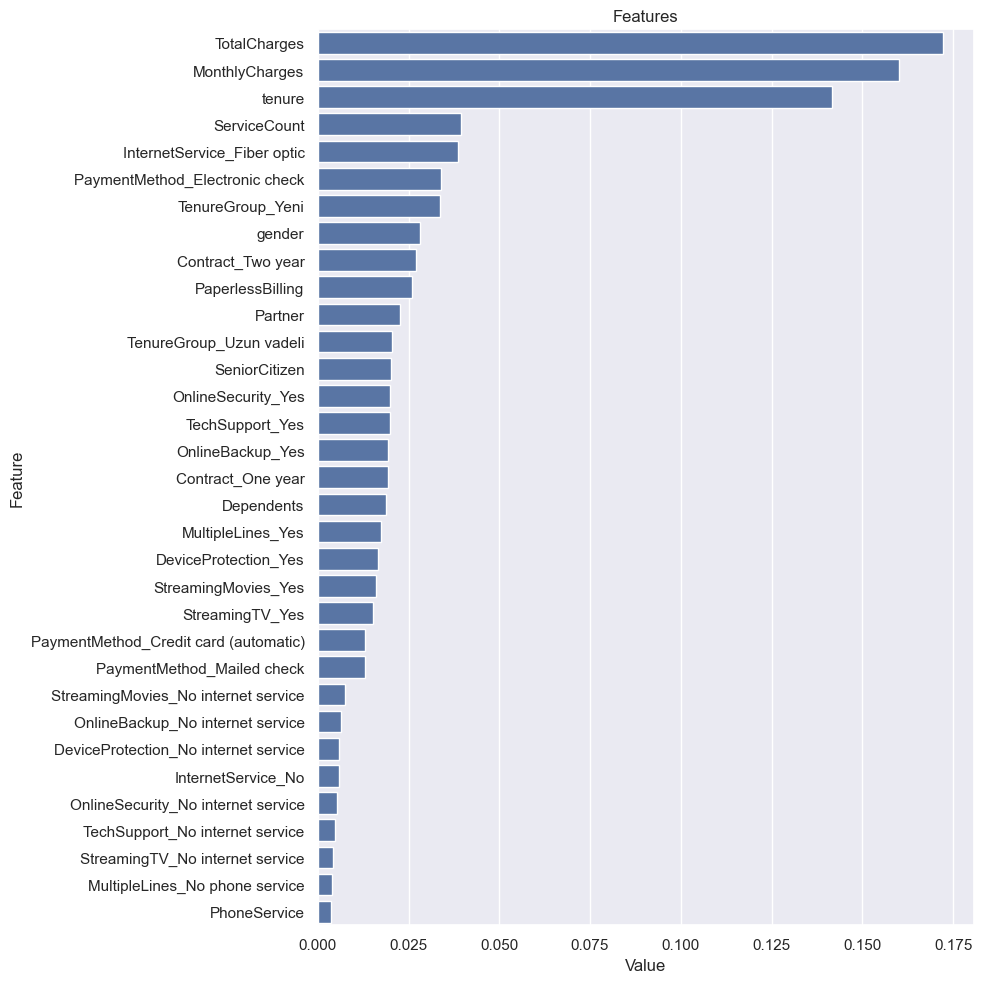

In [40]:
rf_final = RandomForestClassifier(random_state=12345).fit(X, y)
plot_importance(rf_final, X)

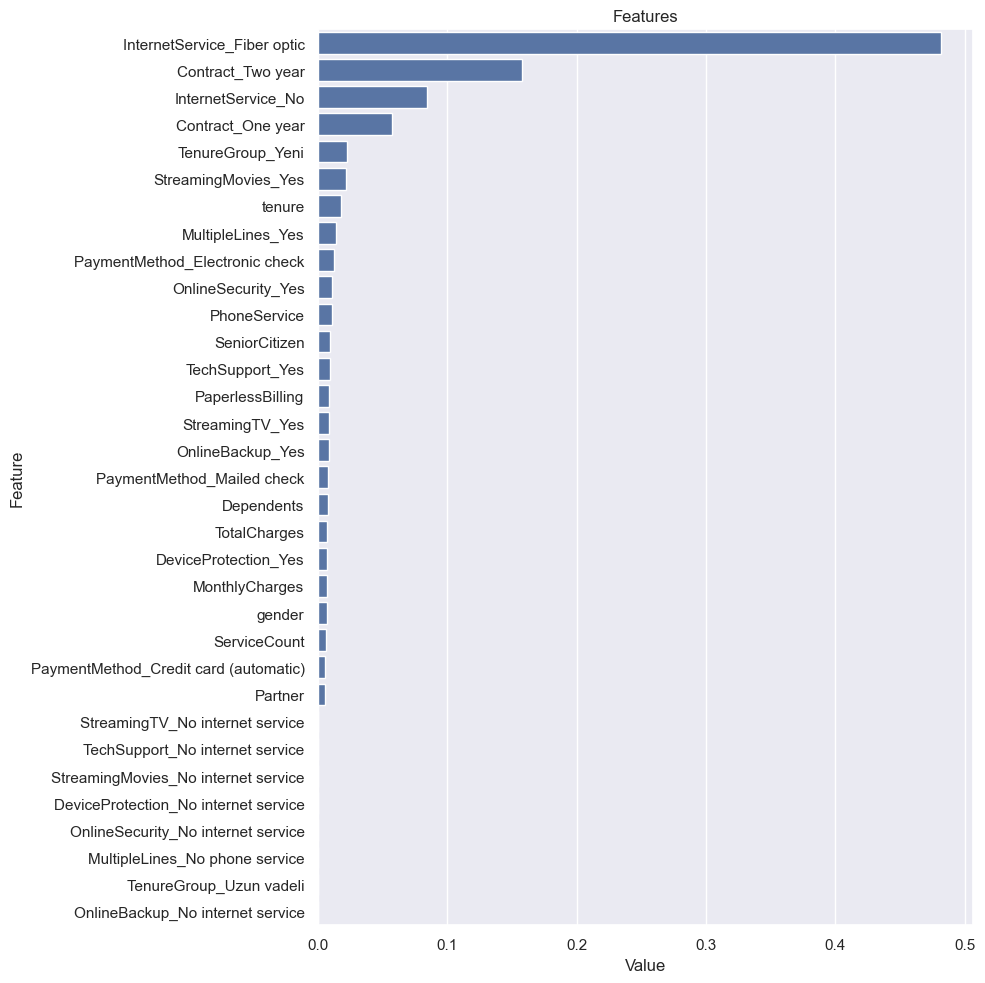

In [41]:
xgboost_final = XGBClassifier(random_state=12345).fit(X, y)
plot_importance(xgboost_final, X)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243


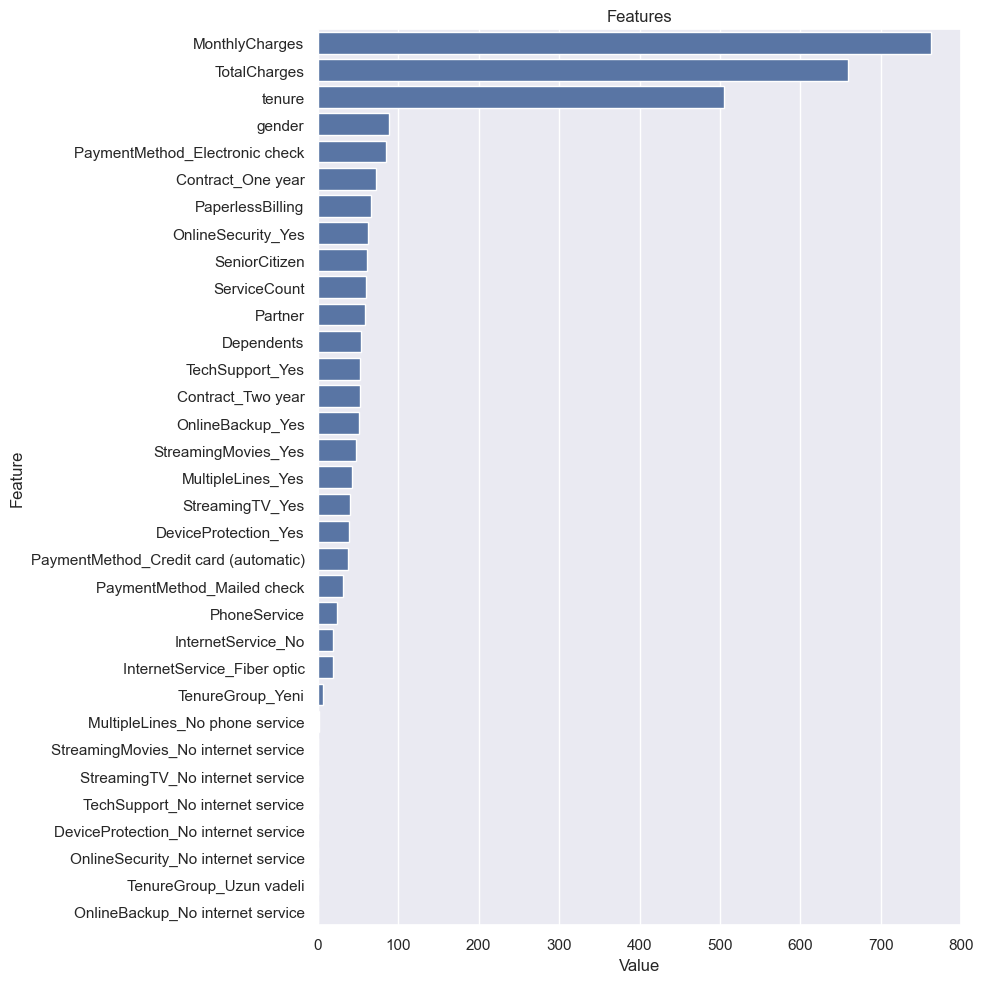

In [42]:
lgbm_final = LGBMClassifier(random_state=12345).fit(X, y)
plot_importance(lgbm_final, X)

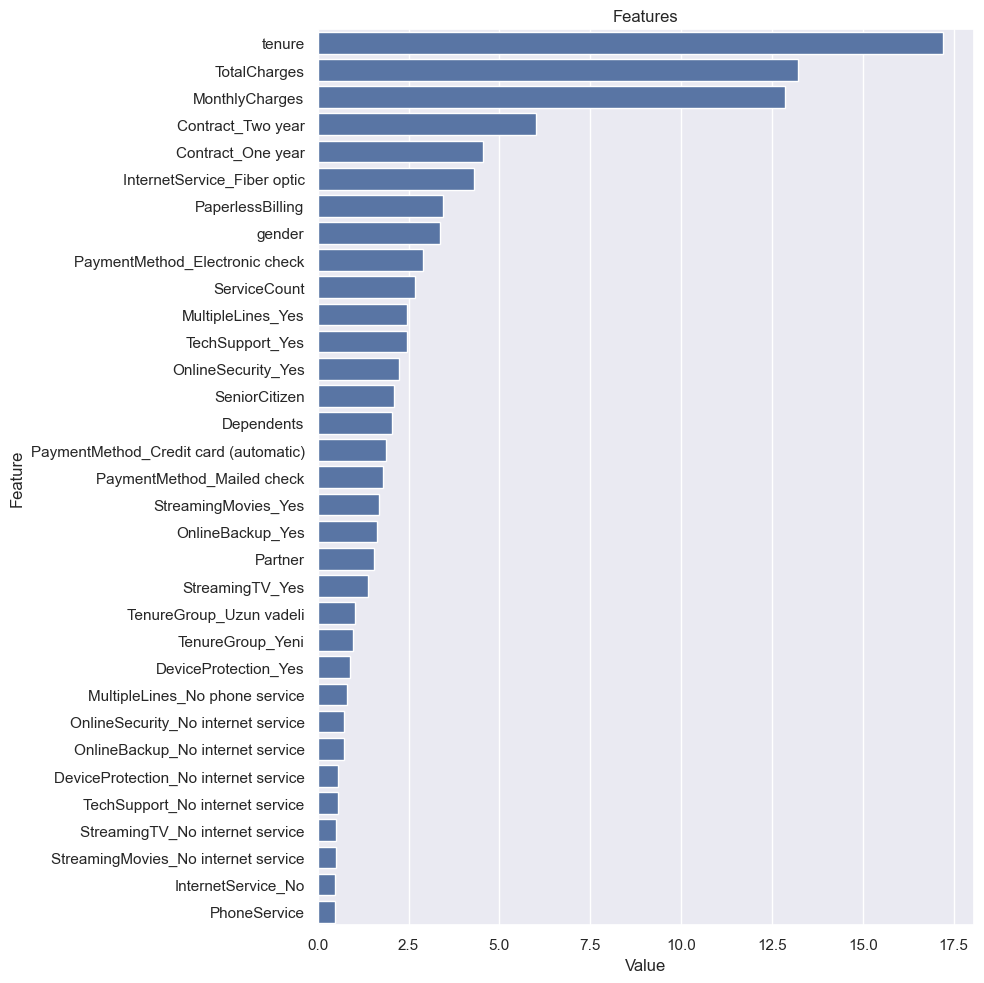

In [43]:
catboost_final = CatBoostClassifier(verbose=False, random_state=12345).fit(X, y)
plot_importance(catboost_final, X)